In [7]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

def plot_result(rgb, result):
    """
    Plot YOLO prediction results with a single label "image".

    Parameters:
      - rgb: numpy array of the RGB image.
      - result: YOLO prediction result.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(rgb)

    class_names = ["image"]  # Assuming only one class named "image"
    height, width, _ = rgb.shape

    predictions = result.boxes.xywh.cpu().numpy()
    pred_classes = result.boxes.cls.cpu().numpy()

    print(pred_classes)

    for i, pred_box in enumerate(predictions):
        pred_class_id = int(pred_classes[i])
        pred_box = pred_box.tolist()

        color = 'red'  # Default color for predictions
        cx, cy, w, h = pred_box
        hw, hh = w / 2, h / 2

        ax.add_patch(Rectangle(
            (cx - hw, cy - hh), w, h,
            edgecolor=color,
            fill=None,
            linewidth=2
        ))

        label_text = class_names[pred_class_id]
        ax.text(
            cx - hw, cy - hh - 5,
            label_text,
            color=color,
            fontsize=10,
            fontweight='bold',
            bbox=dict(facecolor='white', edgecolor=color, alpha=0.7)
        )

    plt.show()


In [2]:
def read_labels(file_name):
  """
    Reads a label file
  """

  with open(file_name, "r") as f:
    lines = f.read().splitlines()

  labels = []
  for line in lines:
    label = [float(n) for n in line.split(" ")]
    label = int(label[0]), label[1:]
    labels.append(label)
  return labels

In [3]:
from ultralytics import YOLO

# Load the best model we have so far:
model_file = "runs/detect/train/weights/best.pt"
model = YOLO(model_file)

In [4]:
import cv2

image = cv2.imread("target_image/team3.jpg")

# remember to convert it to RGB if using OpenCV
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = model.predict(rgb)[0]


0: 480x640 3 images, 26.4ms
Speed: 2.7ms preprocess, 26.4ms inference, 351.4ms postprocess per image at shape (1, 3, 480, 640)


[          0           0           0]


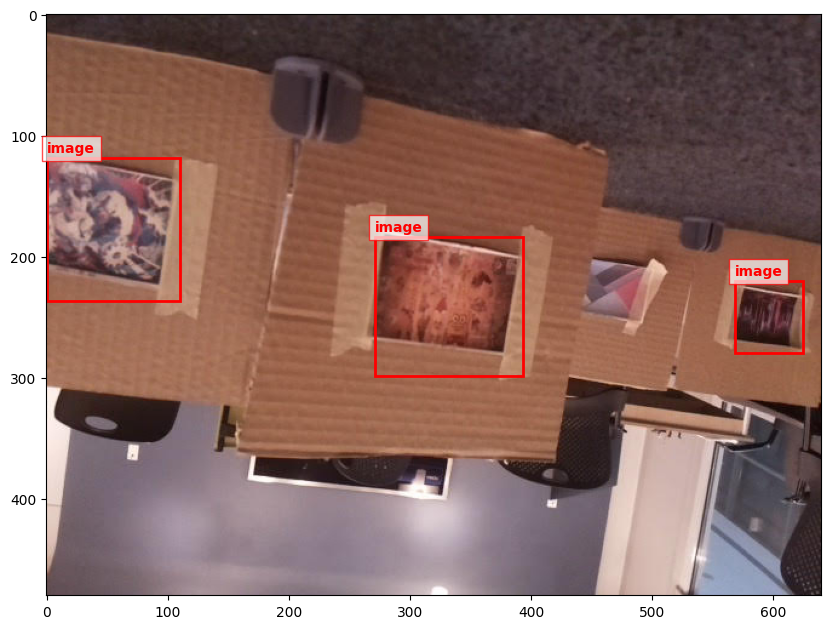

In [8]:
plot_result(rgb, result)